In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/result.csv', parse_dates=['time'], index_col=['time'])
data

,outdoor_temp,zone_temp,occupancy,supply_temp,air_flow
time,,,,,
2017-01-01 00:00:00,2.200,22.832449,0,25.000003,0.733767
2017-01-01 00:05:00,1.825,22.824465,0,25.000003,0.733767
2017-01-01 00:10:00,1.450,22.812760,0,25.000003,0.733767
2017-01-01 00:15:00,1.075,22.799019,0,25.000003,0.733767
2017-01-01 00:20:00,0.700,22.784421,0,25.000003,0.733767
...,...,...,...,...,...
2017-12-31 23:40:00,6.000,22.990503,0,25.000004,0.733767
2017-12-31 23:45:00,6.000,22.988552,0,25.000004,0.733767
2017-12-31 23:50:00,6.000,22.986715,0,25.000004,0.733767


In [7]:
train_data = data.loc['2017-07-04 07:00:00':'2017-07-04 09:30:00']
test_data = data.loc['2017-07-04 09:35:00':'2017-07-04 10:00:00']

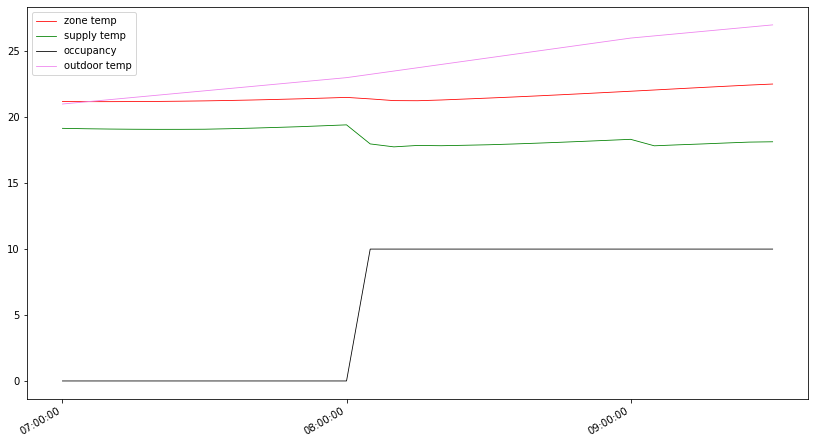

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(train_data.index, train_data['zone_temp'].values, color = 'red', linewidth = 0.8, label = 'zone temp')
ax.plot(train_data.index, train_data['supply_temp'].values, color = 'green', linewidth = 0.8, label = 'supply temp')
ax.plot(train_data.index, train_data['occupancy'].values, color = 'black', linewidth = 0.8, label = 'occupancy')
ax.plot(train_data.index, train_data['outdoor_temp'].values, color = 'violet', linewidth = 0.8, label = 'outdoor temp')
#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
plt.legend()
plt.show()

<AxesSubplot:>

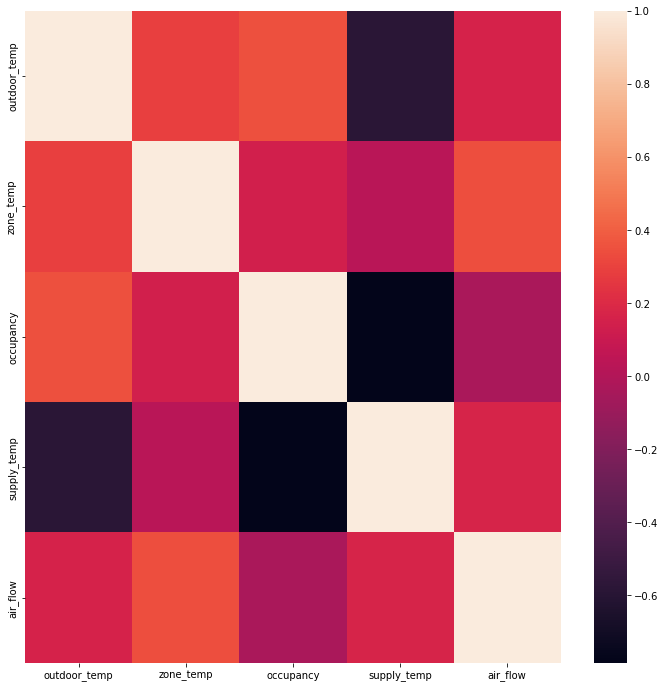

In [9]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())

In [34]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

x = train_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y = train_data[['zone_temp']]

scale = StandardScaler()

#x = scale.fit_transform(x)
#y = scale.fit_transform(y)
regr = linear_model.LinearRegression()
regr.fit(x, y)

x_test = test_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y_test = test_data[['zone_temp']]
#x_test = scale.fit_transform(x_test)
#y_test = scale.fit_transform(y_test)
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.23050669684987932

In [11]:
#x = sm.add_constant(train_data['outdoor_temp']) # adding a constant
 
model = sm.OLS(y, x).fit()
y_pred = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              zone_temp   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     132.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           2.87e-16
Time:                        13:13:21   Log-Likelihood:                 26.354
No. Observations:                  31   AIC:                            -44.71
Df Residuals:                      27   BIC:                            -38.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
supply_temp     -0.1222      0.183     -0.669   

In [12]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score, mean_squared_error

error = rmse(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.23050669685036632

In [13]:
print(y_test)
y_pred

                     zone_temp
time                          
2017-07-04 09:35:00  22.581924
2017-07-04 09:40:00  22.643272
2017-07-04 09:45:00  22.703502
2017-07-04 09:50:00  22.764364
2017-07-04 09:55:00  22.826025
2017-07-04 10:00:00  22.888415


time
2017-07-04 09:35:00    22.380416
2017-07-04 09:40:00    22.431049
2017-07-04 09:45:00    22.481055
2017-07-04 09:50:00    22.530452
2017-07-04 09:55:00    22.579265
2017-07-04 10:00:00    22.627517
dtype: float64

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
regressor = SVR()
model = regressor.fit(x, y)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print('y_test: ',y_test.zone_temp.values)
print('y_pred: ',y_pred)

0.7815623431928146
y_test:  [22.58192416 22.64327222 22.70350169 22.76436411 22.82602525 22.88841549]
y_pred:  [21.91664882 21.93284403 21.94895672 21.96497789 21.98089813 21.99670792]


C:\Users\renat\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
x = data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y = data[['zone_temp']]

In [16]:
print(y_pred)
test = 2*y_pred
print(test)

[21.91664882 21.93284403 21.94895672 21.96497789 21.98089813 21.99670792]
[43.83329764 43.86568806 43.89791343 43.92995578 43.96179626 43.99341584]


In [17]:
from sklearn import preprocessing
y_pred1 = np.round(y_pred, 2)
test1 = np.round(test, 2)
p = np.histogram(y_pred1)[0] / len(y_pred1)    
q = np.histogram(test1)[0] / len(test1)
#print(np.histogram(y_pred1))
print(p)
print(q)
print(np.sum(p))

[0.16666667 0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.16666667]
0.9999999999999999


In [18]:
from scipy.spatial import distance
distance.jensenshannon(p, q) ** 2

0.4620981203732969

In [19]:
vec1 = [23.10465662,23.11223222, 23.25762798]
vec2 = [23.90325824,23.90325824,23.90325824]
vec1 = np.round(vec1, 2)
vec2 = np.round(vec2, 2)
min_vec1 = min(vec1)
min_vec2 = min(vec2)
max_vec1 = max(vec1)
max_vec2 = max(vec2)
mini = min_vec1
maxi = max_vec1
if min_vec1 > min_vec2:
    mini = min_vec2
if max_vec1 < max_vec2:
    maxi = max_vec2
b = []
i = mini
while i <= maxi+0.1:
    b.append(i)
    i = i + 0.1
vec3 = np.random.uniform(low=0, high=60, size=(10,))
vec4 = np.random.uniform(low=0, high=60, size=(10,))
print(vec1)
print(vec2)
print(maxi)
print(mini)
b = np.round(b, 2)
print(b)

[23.1  23.11 23.26]
[23.9 23.9 23.9]
23.9
23.1
[23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9]


In [20]:
p = np.histogram(vec1, bins = b)[0] / len(vec1)
print(np.histogram(vec1, bins = b)[0])
q = np.histogram(vec2, bins = b)[0] / len(vec2)
print(np.histogram(vec2, bins = b)[0])
#print(np.histogram(y_pred1))
print(p)
print(q)
print(np.sum(p))

[2 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 3]
[0.66666667 0.33333333 0.         0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 1.]
1.0


In [21]:
distance.jensenshannon(p, q) ** 2

0.6931471805599452

In [22]:
s = []
for i in range(10):
    vec3 = np.random.uniform(low=0, high=0.1, size=(10,))
    vec4 = np.random.uniform(low=0, high=0.1, size=(10,))
    vec3 = np.round(vec3, 2)
    vec4 = np.round(vec4, 2)
    print(vec3)
    print(vec4)
    p = np.histogram(vec3)[0] / len(vec3)    
    q = np.histogram(vec4)[0] / len(vec4)
    s.append(distance.jensenshannon(p, q))
s = np.array(s)
print(np.median(s))
print(np.mean(s))

[0.08 0.03 0.09 0.08 0.02 0.04 0.05 0.09 0.06 0.09]
[0.07 0.06 0.05 0.03 0.01 0.02 0.05 0.04 0.01 0.05]
[0.07 0.02 0.01 0.1  0.01 0.08 0.1  0.02 0.02 0.01]
[0.04 0.08 0.04 0.1  0.04 0.08 0.05 0.07 0.09 0.08]
[0.04 0.01 0.01 0.06 0.   0.09 0.05 0.06 0.02 0.09]
[0.08 0.05 0.03 0.03 0.03 0.03 0.04 0.   0.03 0.1 ]
[0.05 0.02 0.07 0.07 0.1  0.04 0.05 0.06 0.02 0.1 ]
[0.04 0.02 0.03 0.06 0.08 0.02 0.07 0.06 0.01 0.03]
[0.02 0.08 0.01 0.04 0.08 0.04 0.05 0.04 0.05 0.07]
[0.08 0.03 0.02 0.02 0.08 0.09 0.09 0.08 0.01 0.02]
[0.03 0.09 0.07 0.01 0.01 0.04 0.08 0.05 0.06 0.09]
[0.07 0.04 0.01 0.1  0.1  0.04 0.05 0.03 0.05 0.07]
[0.04 0.1  0.09 0.01 0.1  0.06 0.02 0.05 0.01 0.08]
[0.06 0.09 0.1  0.09 0.07 0.01 0.02 0.   0.09 0.01]
[0.01 0.08 0.05 0.05 0.07 0.05 0.03 0.04 0.05 0.04]
[0.02 0.06 0.08 0.04 0.01 0.09 0.06 0.06 0.09 0.08]
[0.01 0.03 0.08 0.03 0.03 0.07 0.07 0.1  0.07 0.07]
[0.1  0.1  0.04 0.01 0.1  0.09 0.07 0.01 0.03 0.08]
[0.08 0.08 0.05 0.04 0.06 0.09 0.06 0.07 0.09 0.09]
[0.05 0.05 0

In [64]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
data.head()


,outdoor_temp,zone_temp,occupancy,supply_temp,air_flow
time,,,,,
2017-01-01 00:00:00,2.200,22.832449,0,25.000003,0.733767
2017-01-01 00:05:00,1.825,22.824465,0,25.000003,0.733767
2017-01-01 00:10:00,1.450,22.812760,0,25.000003,0.733767
2017-01-01 00:15:00,1.075,22.799019,0,25.000003,0.733767
2017-01-01 00:20:00,0.700,22.784421,0,25.000003,0.733767


In [65]:
def optimise_pls(X,y, n_comps):
    pls = PLSRegression(n_components= n_comps)
    #cross-validation with 10 fold 
    y_cv = cross_val_predict(pls,X,y, cv =10)
    
    #computing scores
    r2 = r2_score(y,y_cv)
    mse = mean_squared_error(y,y_cv)
    rdp = y.std()/np.sqrt(mse)
    
    return(y_cv, r2, mse, rdp)

In [75]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1,5) # 40 components
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls(x, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [67]:
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

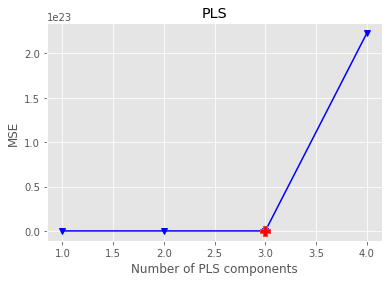

In [68]:
plot_metrics(mses, 'MSE', 'min')

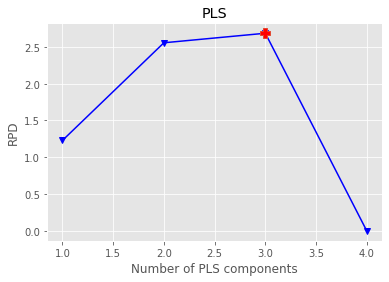

In [69]:
plot_metrics(rpds, 'RPD', 'max')

In [70]:
 y_cv, r2, mse, rpd = optimise_pls(x, y, 3)

In [71]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8567, MSE: 0.0241, RPD: 2.6851


In [82]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
pls = PLSRegression(n_components=3)
pls.fit(x, y)
y_pred = pls.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print('y_test: ',y_test.zone_temp.values)
print('y_pred: ',y_pred.T)

0.11346531303414564
y_test:  [21.17880933 22.43526826 21.3878938  21.39317093 22.25318125 22.06337397
 21.7861834  21.44523704 21.37793593 21.87713665]
y_pred:  [[21.07444724 22.27865364 21.14507687 21.48071499 22.18891149 22.09887438
  21.84358316 21.52575768 21.47857836 21.91458096]]


In [83]:
print(y_test)
y_pred.T

                     zone_temp
time                          
2017-07-04 07:10:00  21.178809
2017-07-04 09:25:00  22.435268
2017-07-04 08:05:00  21.387894
2017-07-04 07:50:00  21.393171
2017-07-04 09:15:00  22.253181
2017-07-04 09:05:00  22.063374
2017-07-04 08:50:00  21.786183
2017-07-04 07:55:00  21.445237
2017-07-04 08:25:00  21.377936
2017-07-04 08:55:00  21.877137


array([[21.07444724, 22.27865364, 21.14507687, 21.48071499, 22.18891149,
        22.09887438, 21.84358316, 21.52575768, 21.47857836, 21.91458096]])

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
scaled_X = scaler.fit_transform(data)

In [87]:
scaled_X

array([[-1.73896215, -0.73395746, -0.68891696,  1.00223083,  0.52638576],
       [-1.78347551, -0.74577637, -0.68891696,  1.00223082,  0.52638576],
       [-1.82798888, -0.76310281, -0.68891696,  1.00223082,  0.52638576],
       ...,
       [-1.2878934 , -0.50559768, -0.68891696,  1.00223124,  0.52638576],
       [-1.2878934 , -0.50815011, -0.68891696,  1.00223123,  0.52638576],
       [-1.2878934 , -0.51054244, -0.68891696,  1.00223123,  0.52638576]])

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)

In [90]:
principal_components = pca.fit_transform(scaled_X)

Text(0, 0.5, 'Second Principal Component')

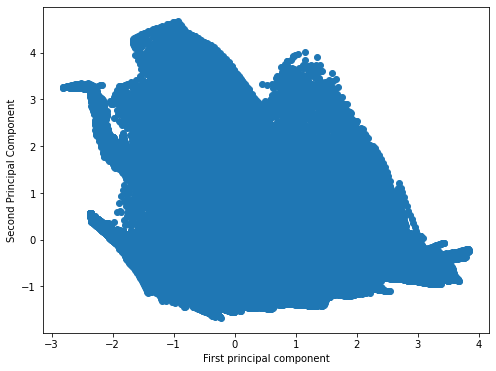

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [92]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=data.columns)

In [93]:
df_comp

,outdoor_temp,zone_temp,occupancy,supply_temp,air_flow
PC1,0.511334,0.179408,0.571570,-0.615911,0.017660
PC2,-0.215326,-0.637635,0.135406,-0.258331,-0.679697


<AxesSubplot:>

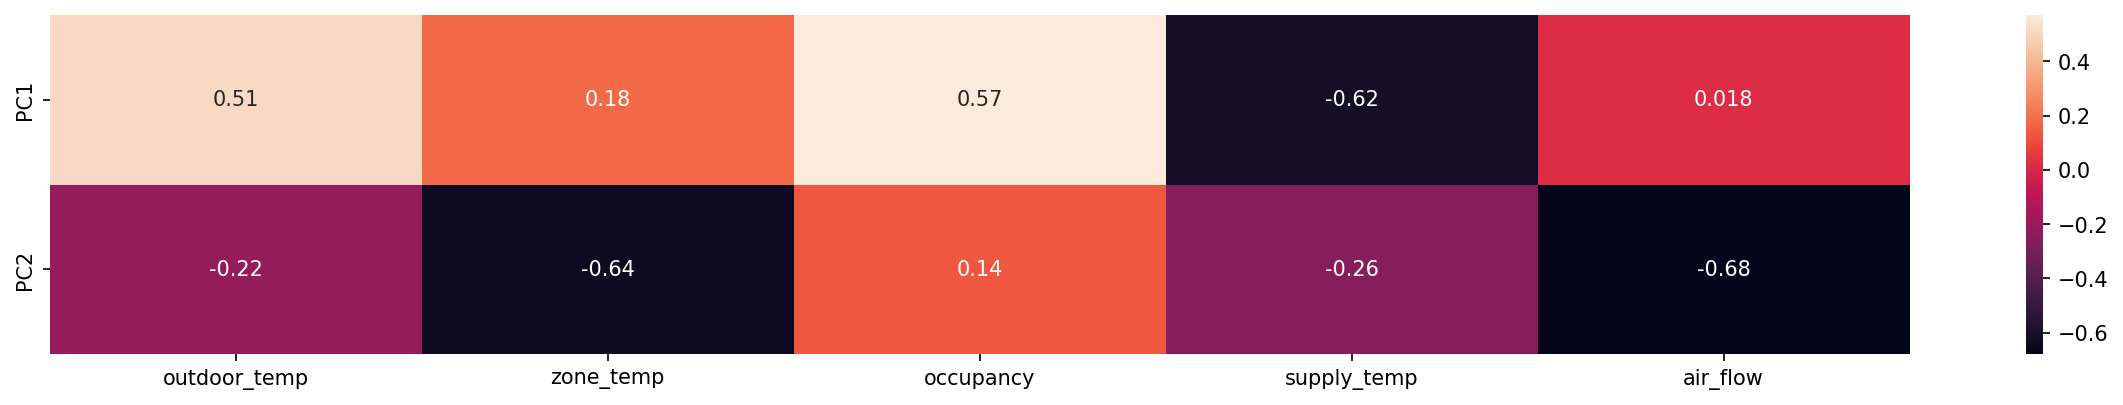

In [94]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True)

In [95]:
pca.explained_variance_ratio_

array([0.43999779, 0.28901628])

In [96]:
np.sum(pca.explained_variance_ratio_)

0.7290140652429061

In [119]:
pca_5 = PCA(n_components=5)
pca_5.fit(scaled_X)

PCA(n_components=5)

In [120]:
pca_5.explained_variance_ratio_

array([0.43999779, 0.28901628, 0.12800727, 0.12053803, 0.02244063])

In [121]:
np.sum(pca_5.explained_variance_ratio_)

1.0

In [122]:
explained_variance = []

for n in range(1,5):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

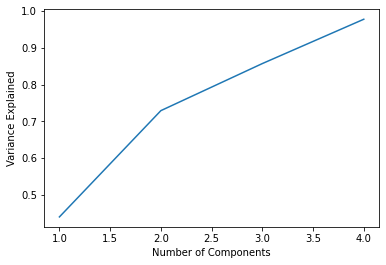

In [123]:
plt.plot(range(1,5),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");